In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import networkx
from matplotlib import pyplot as plt

In [5]:
df = gpd.read_file(r"C:\Users\smrut\Downloads\IND_adm\IND_adm1.shp")

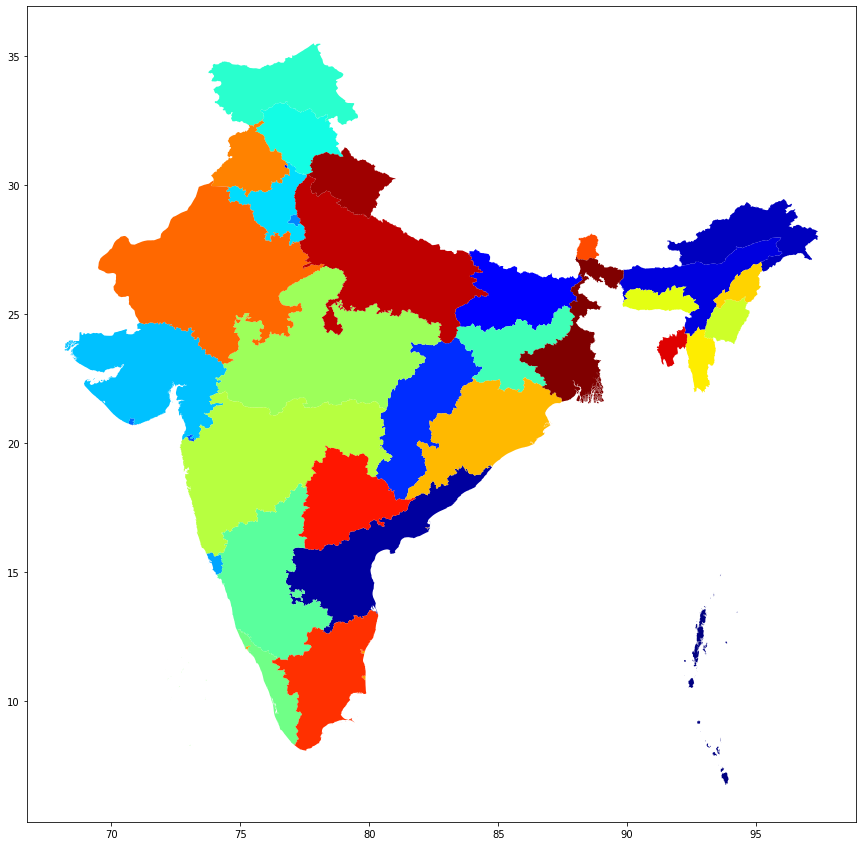

In [6]:
df.plot(figsize=(15, 15), cmap="jet")
plt.show();

In [7]:
df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la FrontiÃ¨re du Nord-Est(French-obs...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


adjacency_matrix based on neabour

In [8]:
G_adj_poly = networkx.DiGraph()
num_poly = df.shape[0]
for i in range(num_poly):
    for j in range(num_poly):
        if df.geometry[i].touches(df.geometry[j]):
            G_adj_poly.add_edge(i, j, weight=1)
A_adj_poly = networkx.adjacency_matrix(G_adj_poly).A

adjacency_matrix based on distance between centriods

In [44]:
df["centroid"] = df.geometry.centroid
G_dist = networkx.DiGraph()
for i in range(num_poly):
    for j in range(num_poly):
        if df.geometry[i].touches(df.geometry[j]):
            G_dist.add_edge(i, j, weight=df.centroid[i].distance(df.centroid[j]))
df.drop("centroid", axis=1, inplace=True)
A_dist = networkx.adjacency_matrix(G_dist).A

default is eucledian distance

In [65]:
df["centroid"] = df.geometry.centroid
p1 = df.centroid[0]
p2 = df.centroid[1]
print(((p1.y-p2.y)**2 + (p1.x-p2.x)**2)**0.5)
print(df.centroid[0].distance(df.centroid[1]))

13.79077178625558
13.79077178625558


karnataka and andra pradesh (minimum distance)

In [68]:
df.geometry[1].distance(df.geometry[16])

0.0